<a href="https://colab.research.google.com/github/mathchou/CSC485-Sp24/blob/cfitz/DSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn as sk
import matplotlib
import seaborn as sb
import tensorflow as tf
import pandas as pd
import csv as csv
import seaborn as sns

In [ ]:
top50 = pd.read_csv('/content/Top-50-musicality-global 3.csv')
print(top50)

      Unnamed: 0 Country                                         Track Name  \
0              0  Global                               Standing Next to You   
1              1  Global                                             greedy   
2              2  Global                                        Si No Estás   
3              3  Global                Seven (feat. Latto) (Explicit Ver.)   
4              4  Global  Is It Over Now? (Taylor's Version) (From The V...   
...          ...     ...                                                ...   
3584        3584     VNM                                   Too Sad to Dance   
3585        3585     VNM                           tình yêu có nghĩa là gì?   
3586        3586     VNM                                           You & Me   
3587        3587     VNM                                Shot Glass of Tears   
3588        3588     VNM                                         Thằng Điên   

         Artist Name                        Album N

In [ ]:
t50 = top50.dropna()
print(t50)

      Unnamed: 0 Country                                         Track Name  \
0              0  Global                               Standing Next to You   
1              1  Global                                             greedy   
2              2  Global                                        Si No Estás   
3              3  Global                Seven (feat. Latto) (Explicit Ver.)   
4              4  Global  Is It Over Now? (Taylor's Version) (From The V...   
...          ...     ...                                                ...   
3584        3584     VNM                                   Too Sad to Dance   
3585        3585     VNM                           tình yêu có nghĩa là gì?   
3586        3586     VNM                                           You & Me   
3587        3587     VNM                                Shot Glass of Tears   
3588        3588     VNM                                         Thằng Điên   

         Artist Name                        Album N

In [ ]:
t50.columns

Index(['Unnamed: 0', 'Country', 'Track Name', 'Artist Name', 'Album Name',
       'Popularity', 'Date', 'Markets', 'Danceability', 'Acousticness',
       'duration', 'Energy', 'Instrumentalness', 'Key', 'Liveness', 'Loudness',
       'Mode', 'Speechiness', 'Tempo', 'TSignature', 'Positiveness'],
      dtype='object')

In [ ]:
t50.head()

,Unnamed: 0,Country,Track Name,Artist Name,Album Name,Popularity,Date,Markets,Danceability,Acousticness,...,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,TSignature,Positiveness
0,0,Global,Standing Next to You,Jung Kook,GOLDEN,91,2023-11-03,AR,0.711,0.0447,...,0.809,0.0,2,0.3390,-4.389,0,0.0955,106.017,4,0.816
1,1,Global,greedy,Tate McRae,greedy,100,2023-09-15,AR,0.750,0.2560,...,0.733,0.0,6,0.1140,-3.180,0,0.0319,111.018,1,0.844
2,2,Global,Si No Estás,iñigo quintero,Si No Estás,99,2022-09-23,AR,0.537,0.8270,...,0.421,0.0,5,0.1380,-8.720,1,0.0285,98.224,4,0.524
3,3,Global,Seven (feat. Latto) (Explicit Ver.),Jung Kook,GOLDEN,82,2023-11-03,AR,0.790,0.3120,...,0.831,0.0,11,0.0797,-4.185,1,0.0440,124.987,4,0.872
4,4,Global,Is It Over Now? (Taylor's Version) (From The V...,Taylor Swift,1989 (Taylor's Version),93,2023-10-26,AR,0.596,0.0504,...,0.658,0.0,0,0.1270,-7.346,1,0.0360,100.012,4,0.176


#*Box Plot for Danceability compared by Country*


<ipython-input-12-c73d69eee11e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='Danceability', data=t50, palette='viridis')


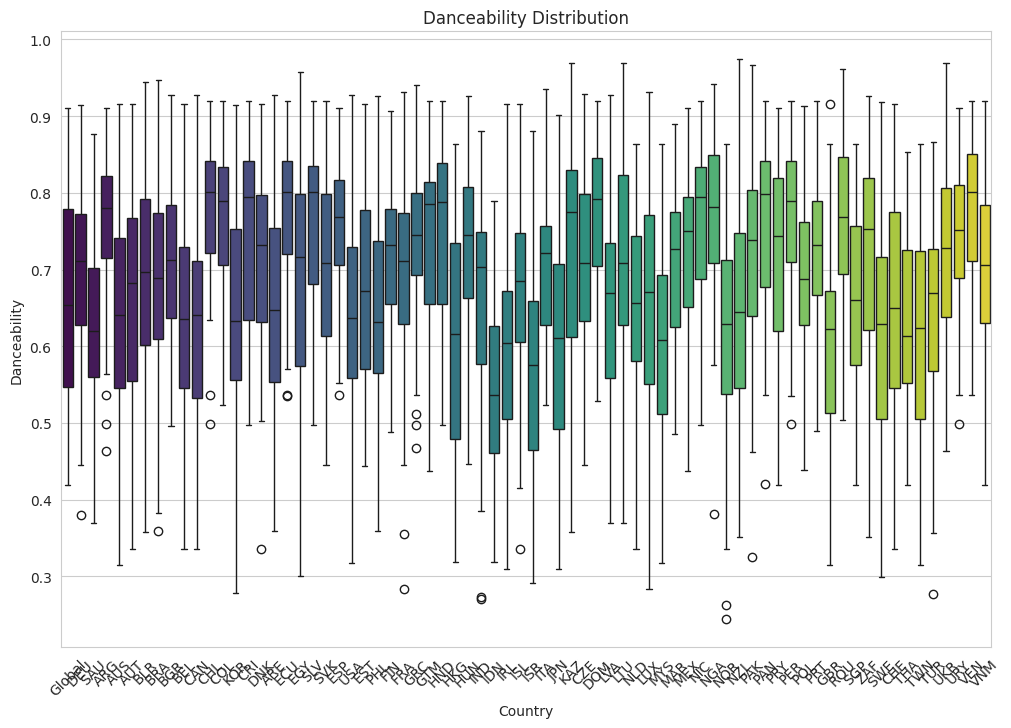

In [ ]:
sns.set_style("whitegrid")
colors = sns.color_palette("Blues_r", as_cmap=True)

plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='Danceability', data=t50, palette='viridis')
plt.title('Danceability Distribution')
plt.xlabel('Country')
plt.ylabel('Danceability')
plt.xticks(rotation=45)  # Rotate genre labels for better readability
plt.show()

<ipython-input-13-8f446a68df4d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='Popularity', data=t50, palette='viridis')


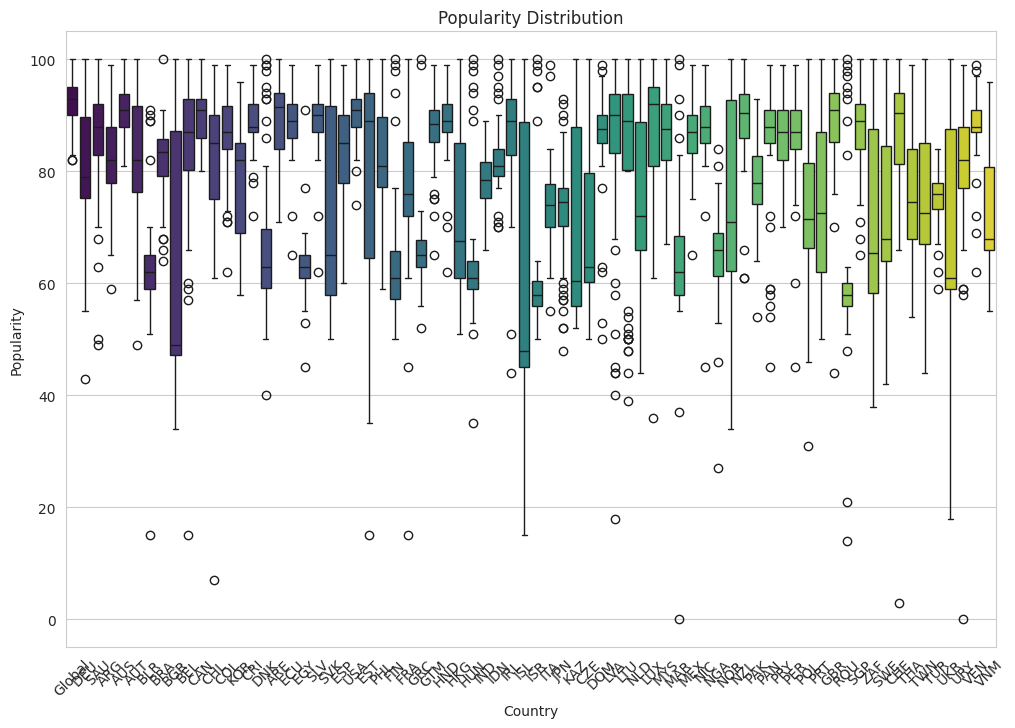

In [ ]:
sns.set_style("whitegrid")
colors = sns.color_palette("Blues_r", as_cmap=True)

plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='Popularity', data=t50, palette='viridis')
plt.title('Popularity Distribution')
plt.xlabel('Country')
plt.ylabel('Popularity')
plt.xticks(rotation=45)  # Rotate genre labels for better readability
plt.show()

#Unpopular Songs Dataset


In [ ]:
unpopular = pd.read_csv('/content/unpopular_songs.csv')
up = unpopular.dropna()
up = up.drop_duplicates()
print(up)

      danceability  energy  key  loudness  mode  speechiness  acousticness  \
0            0.722   0.476    5    -8.203     1       0.0896       0.67000   
1            0.955   0.281    0   -11.392     0       0.4660       0.00480   
2            0.753   0.355    8   -11.799     1       0.5140       0.57300   
3            0.650   0.331    3   -10.818     0       0.3830       0.86500   
4            0.690   0.360    4   -15.624     0       0.4550       0.76400   
...            ...     ...  ...       ...   ...          ...           ...   
4068         0.862   0.578   10    -9.364     0       0.4430       0.01460   
4069         0.686   0.511    8   -10.253     0       0.4350       0.01010   
4070         0.725   0.555    8   -13.018     1       0.3910       0.00189   
4071         0.763   0.534    1    -8.889     1       0.3170       0.00531   
4072         0.724   0.558    1   -10.324     1       0.5060       0.06630   

      instrumentalness  liveness  valence    tempo  duration_ms

In [ ]:
up.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'explicit', 'popularity', 'track_name', 'track_artist',
       'track_id'],
      dtype='object')

In [ ]:
up.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,explicit,popularity,track_name,track_artist,track_id
0,0.722,0.476,5,-8.203,1,0.0896,0.6700,0.0000,0.0926,0.9270,151.968,220549,False,8,Este Corazón,El Javi,0Z4UqiPI5c4dMJ5iPyO61d
1,0.955,0.281,0,-11.392,0,0.4660,0.0048,0.0595,0.1220,0.0934,127.991,149543,True,0,thinking and doing,Br80,568FGhLEnSZhl82t0YmQ96
2,0.753,0.355,8,-11.799,1,0.5140,0.5730,0.0000,0.0735,0.6000,91.978,130019,True,0,Puzzlement,JpThaRuler,4Lex8QZVkptfw2PZtjoXlp
3,0.650,0.331,3,-10.818,0,0.3830,0.8650,0.0000,0.1050,0.5810,99.513,116193,True,0,Sensi,JpThaRuler,4pMqXl6EfmZrodPMYHUq9Z
4,0.690,0.360,4,-15.624,0,0.4550,0.7640,0.0000,0.1810,0.1050,89.893,111827,True,0,Rass,JpThaRuler,2pvQEKHtlkHb6ijMwcMuKV


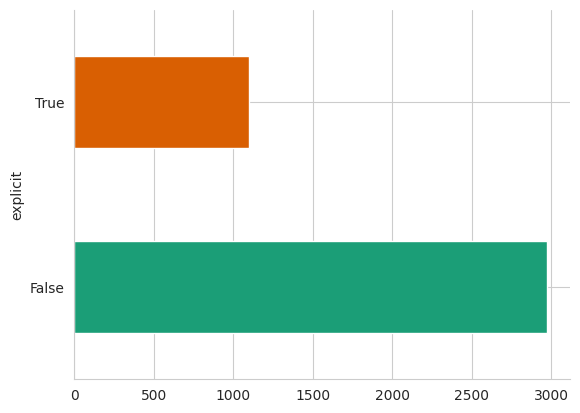

In [ ]:
# @title explicit

from matplotlib import pyplot as plt
import seaborn as sns
up.groupby('explicit').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# prompt: Using dataframe up: suggest a plot

import altair as alt

chart = alt.Chart(up).mark_point().encode(
    alt.X('danceability'),
    alt.Y('energy'),
    color = 'key',
    size = alt.Size('popularity')
).interactive()

chart


alt.Chart(...)

#Top 100 Songs 2010-2019 Dataset

In [ ]:
t100 = pd.read_csv('/content/Spotify 2010 - 2019 Top 100.csv')
t100 = t100.dropna()
t100 = t100.drop_duplicates()
print(t100)

                                             title              artist  \
0                    STARSTRUKK (feat. Katy Perry)               3OH!3   
1                      My First Kiss (feat. Ke$ha)               3OH!3   
2                                  I Need A Dollar          Aloe Blacc   
3    Airplanes (feat. Hayley Williams of Paramore)               B.o.B   
4                Nothin' on You (feat. Bruno Mars)               B.o.B   
..                                             ...                 ...   
995                                     SICKO MODE        Travis Scott   
996                                      EARFQUAKE  Tyler, The Creator   
997                      Boasty (feat. Idris Elba)               Wiley   
998                    Strike a Pose (feat. Aitch)    Young T & Bugsey   
999      The London (feat. J. Cole & Travis Scott)          Young Thug   

       top genre  year released       added    bpm  nrgy  dnce   dB  live  \
0      dance pop         2009.0  2

In [ ]:
t100.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo


#Clustering with K-Means


Starting with the Top 50 spotify songs (Leftover from MTH 320 Project)

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
t50Col = t50[["Popularity", "Danceability", "Positiveness", "Acousticness", "Energy"]]
k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(t50Col)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


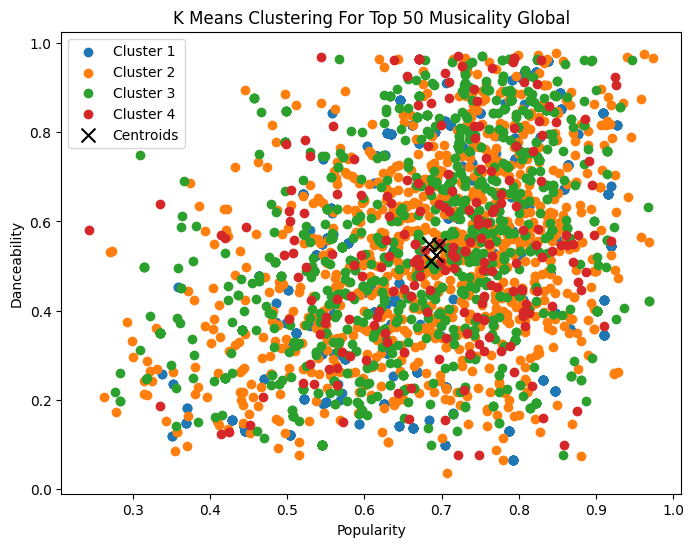

In [ ]:
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(t50Col.values[labels == i, 1], t50Col.values[labels == i, 2],
                label=f'Cluster {i+1}')


plt.scatter(centroids[:, 1], centroids[:, 2], marker='x', s=100, c='black',
            label='Centroids')

plt.xlabel('Popularity')
plt.ylabel('Danceability')
plt.title('K Means Clustering For Top 50 Musicality Global')
plt.legend()



<ipython-input-31-ecb08ee6ea89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t50Col['Cluster'] = labels


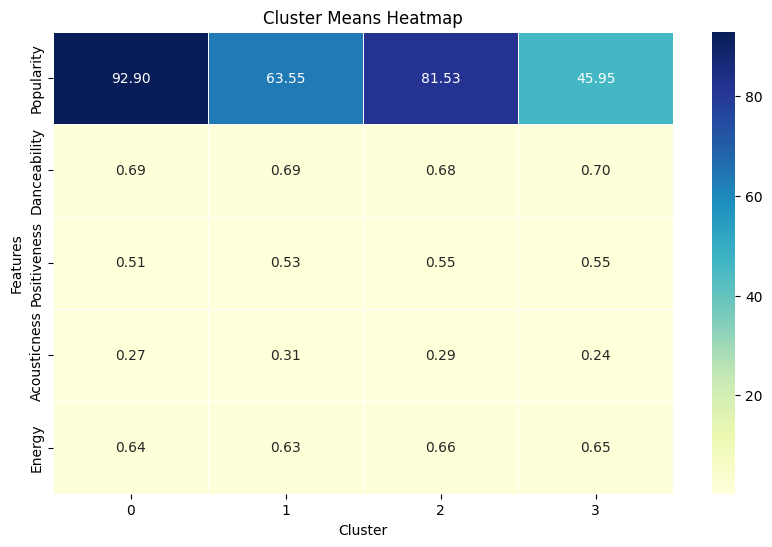

In [ ]:
t50Col['Cluster'] = labels

# Calculating the mean of each cluster
cluster_means = t50Col.groupby('Cluster').mean()

# Creating the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means.T, annot=True, cmap="YlGnBu", fmt='.2f', linewidths=.5)
plt.title('Cluster Means Heatmap')
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.show()

In [ ]:
t50s = t50Col.describe()
print(t50s)

        Popularity  Danceability  Positiveness  Acousticness       Energy  \
count  3583.000000   3583.000000   3583.000000   3583.000000  3583.000000   
mean     78.582473      0.688028      0.528950      0.286092     0.646175   
std      14.913181      0.135750      0.229124      0.258589     0.163489   
min       0.000000      0.244000      0.037300      0.000008     0.024200   
25%      67.000000      0.596000      0.359000      0.080950     0.543000   
50%      83.000000      0.706000      0.524000      0.189000     0.669000   
75%      90.000000      0.795000      0.721000      0.441000     0.761000   
max     100.000000      0.974000      0.978000      0.984000     0.992000   

           Cluster  
count  3583.000000  
mean      1.081217  
std       0.952144  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       2.000000  
max       3.000000  


In [ ]:
up = up.rename(columns={'Unnamed: 0': 'ID'})

In [ ]:
print(up)

      danceability  energy  key  loudness  mode  speechiness  acousticness  \
0            0.722   0.476    5    -8.203     1       0.0896       0.67000   
1            0.955   0.281    0   -11.392     0       0.4660       0.00480   
2            0.753   0.355    8   -11.799     1       0.5140       0.57300   
3            0.650   0.331    3   -10.818     0       0.3830       0.86500   
4            0.690   0.360    4   -15.624     0       0.4550       0.76400   
...            ...     ...  ...       ...   ...          ...           ...   
4068         0.862   0.578   10    -9.364     0       0.4430       0.01460   
4069         0.686   0.511    8   -10.253     0       0.4350       0.01010   
4070         0.725   0.555    8   -13.018     1       0.3910       0.00189   
4071         0.763   0.534    1    -8.889     1       0.3170       0.00531   
4072         0.724   0.558    1   -10.324     1       0.5060       0.06630   

      instrumentalness  liveness  valence    tempo  duration_ms

In [ ]:
# Extracting the desired columns
unpCol = up[["danceability", "energy", "speechiness", "instrumentalness", "popularity"]]

# Number of clusters
k = 5

# KMeans clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(unpCol)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


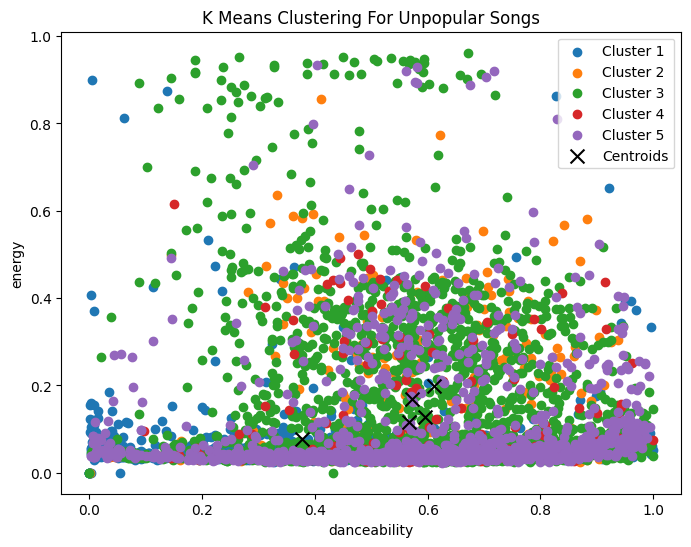

In [ ]:
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(unpCol.values[labels == i, 1], unpCol.values[labels == i, 2],
                label=f'Cluster {i+1}')


plt.scatter(centroids[:, 1], centroids[:, 2], marker='x', s=100, c='black',
            label='Centroids')

plt.xlabel('danceability')
plt.ylabel('energy')
plt.title('K Means Clustering For Unpopular Songs')
plt.legend()



<ipython-input-36-0bf0f0e3c957>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unpCol['Cluster'] = labels


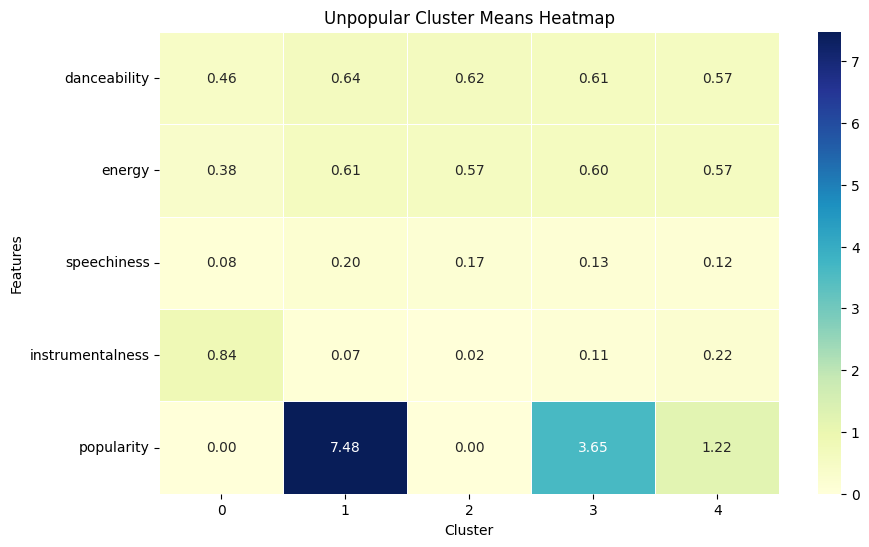

In [ ]:
unpCol['Cluster'] = labels

# Calculating the mean of each cluster
cluster_means = unpCol.groupby('Cluster').mean()

# Creating the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means.T, annot=True, cmap="YlGnBu", fmt='.2f', linewidths=.5)
plt.title('Unpopular Cluster Means Heatmap')
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.show()

In [ ]:
upS = unpCol.describe()
print(upS)

       danceability       energy  speechiness  instrumentalness   popularity  \
count   4073.000000  4073.000000  4073.000000       4073.000000  4073.000000   
mean       0.584909     0.545931     0.142364          0.199610     0.927572   
std        0.195275     0.253181     0.169173          0.348140     1.880363   
min        0.000000     0.000020     0.000000          0.000000     0.000000   
25%        0.460000     0.372000     0.038600          0.000000     0.000000   
50%        0.608000     0.565000     0.060300          0.000037     0.000000   
75%        0.732000     0.736000     0.195000          0.219000     1.000000   
max        0.973000     1.000000     0.962000          1.000000     9.000000   

           Cluster  
count  4073.000000  
mean      1.523202  
std       1.620720  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       3.000000  
max       4.000000  


In [ ]:
t100Col = t100[["nrgy", "dnce", "bpm", "live"]]
k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(t100Col)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


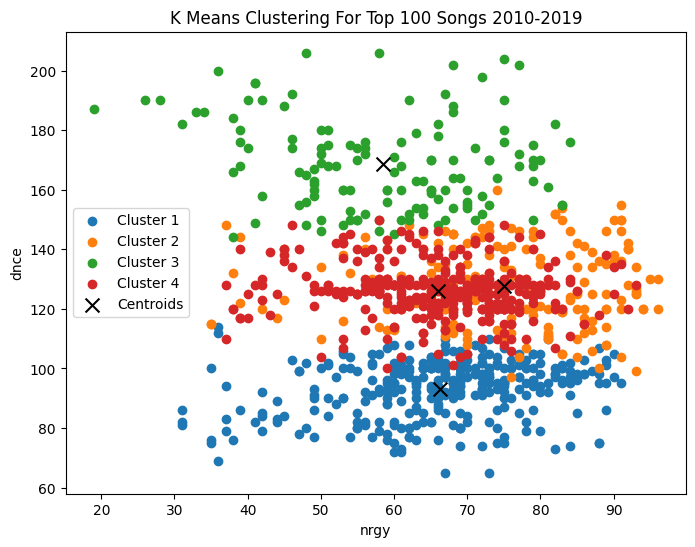

In [ ]:
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(t100Col.values[labels == i, 1], t100Col.values[labels == i, 2],
                label=f'Cluster {i+1}')


plt.scatter(centroids[:, 1], centroids[:, 2], marker='x', s=100, c='black',
            label='Centroids')

plt.xlabel('nrgy')
plt.ylabel('dnce')
plt.title('K Means Clustering For Top 100 Songs 2010-2019')
plt.legend()


In [ ]:
t100s = t50Col.describe()
print(t100s)

        Popularity  Danceability  Positiveness  Acousticness       Energy  \
count  3583.000000   3583.000000   3583.000000   3583.000000  3583.000000   
mean     78.582473      0.688028      0.528950      0.286092     0.646175   
std      14.913181      0.135750      0.229124      0.258589     0.163489   
min       0.000000      0.244000      0.037300      0.000008     0.024200   
25%      67.000000      0.596000      0.359000      0.080950     0.543000   
50%      83.000000      0.706000      0.524000      0.189000     0.669000   
75%      90.000000      0.795000      0.721000      0.441000     0.761000   
max     100.000000      0.974000      0.978000      0.984000     0.992000   

           Cluster  
count  3583.000000  
mean      1.081217  
std       0.952144  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       2.000000  
max       3.000000  


# **Prediction Modeling**

#Unpopular dataset

In [ ]:
up.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,explicit,popularity,track_name,track_artist,track_id
0,0.722,0.476,5,-8.203,1,0.0896,0.6700,0.0000,0.0926,0.9270,151.968,220549,False,8,Este Corazón,El Javi,0Z4UqiPI5c4dMJ5iPyO61d
1,0.955,0.281,0,-11.392,0,0.4660,0.0048,0.0595,0.1220,0.0934,127.991,149543,True,0,thinking and doing,Br80,568FGhLEnSZhl82t0YmQ96
2,0.753,0.355,8,-11.799,1,0.5140,0.5730,0.0000,0.0735,0.6000,91.978,130019,True,0,Puzzlement,JpThaRuler,4Lex8QZVkptfw2PZtjoXlp
3,0.650,0.331,3,-10.818,0,0.3830,0.8650,0.0000,0.1050,0.5810,99.513,116193,True,0,Sensi,JpThaRuler,4pMqXl6EfmZrodPMYHUq9Z
4,0.690,0.360,4,-15.624,0,0.4550,0.7640,0.0000,0.1810,0.1050,89.893,111827,True,0,Rass,JpThaRuler,2pvQEKHtlkHb6ijMwcMuKV


Testing Random Forest

In [ ]:
unpopular = pd.read_csv('/content/unpopular_songs.csv')
up = unpopular.dropna()
up = up.drop_duplicates()
print(up)

      danceability  energy  key  loudness  mode  speechiness  acousticness  \
0            0.722   0.476    5    -8.203     1       0.0896       0.67000   
1            0.955   0.281    0   -11.392     0       0.4660       0.00480   
2            0.753   0.355    8   -11.799     1       0.5140       0.57300   
3            0.650   0.331    3   -10.818     0       0.3830       0.86500   
4            0.690   0.360    4   -15.624     0       0.4550       0.76400   
...            ...     ...  ...       ...   ...          ...           ...   
4068         0.862   0.578   10    -9.364     0       0.4430       0.01460   
4069         0.686   0.511    8   -10.253     0       0.4350       0.01010   
4070         0.725   0.555    8   -13.018     1       0.3910       0.00189   
4071         0.763   0.534    1    -8.889     1       0.3170       0.00531   
4072         0.724   0.558    1   -10.324     1       0.5060       0.06630   

      instrumentalness  liveness  valence    tempo  duration_ms

In [ ]:
X= up[['danceability', 'energy', 'speechiness']]
y= up['popularity']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
unpRegressor = RandomForestRegressor(n_estimators=50, max_depth=None, random_state=42)

In [ ]:
unpRegressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [ ]:
prd = unpRegressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, prd)
print("mse: ", mse)

mse:  3.650126625766871


testing KNN Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
unpopular = pd.read_csv('/content/unpopular_songs.csv')
up = unpopular.dropna()
up = up.drop_duplicates()
print(up)

      danceability  energy  key  loudness  mode  speechiness  acousticness  \
0            0.722   0.476    5    -8.203     1       0.0896       0.67000   
1            0.955   0.281    0   -11.392     0       0.4660       0.00480   
2            0.753   0.355    8   -11.799     1       0.5140       0.57300   
3            0.650   0.331    3   -10.818     0       0.3830       0.86500   
4            0.690   0.360    4   -15.624     0       0.4550       0.76400   
...            ...     ...  ...       ...   ...          ...           ...   
4068         0.862   0.578   10    -9.364     0       0.4430       0.01460   
4069         0.686   0.511    8   -10.253     0       0.4350       0.01010   
4070         0.725   0.555    8   -13.018     1       0.3910       0.00189   
4071         0.763   0.534    1    -8.889     1       0.3170       0.00531   
4072         0.724   0.558    1   -10.324     1       0.5060       0.06630   

      instrumentalness  liveness  valence    tempo  duration_ms

In [ ]:
X = up[['danceability', 'energy', 'speechiness']]

y = up['popularity']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

In [ ]:
knn_regressor.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [ ]:
predictions = knn_regressor.predict(X_test_scaled)



In [ ]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.9417423312883435


Testing Linear Regression (Best MSE)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
unpopular = pd.read_csv('/content/unpopular_songs.csv')
up = unpopular.dropna()
up = up.drop_duplicates()
print(up)

      danceability  energy  key  loudness  mode  speechiness  acousticness  \
0            0.722   0.476    5    -8.203     1       0.0896       0.67000   
1            0.955   0.281    0   -11.392     0       0.4660       0.00480   
2            0.753   0.355    8   -11.799     1       0.5140       0.57300   
3            0.650   0.331    3   -10.818     0       0.3830       0.86500   
4            0.690   0.360    4   -15.624     0       0.4550       0.76400   
...            ...     ...  ...       ...   ...          ...           ...   
4068         0.862   0.578   10    -9.364     0       0.4430       0.01460   
4069         0.686   0.511    8   -10.253     0       0.4350       0.01010   
4070         0.725   0.555    8   -13.018     1       0.3910       0.00189   
4071         0.763   0.534    1    -8.889     1       0.3170       0.00531   
4072         0.724   0.558    1   -10.324     1       0.5060       0.06630   

      instrumentalness  liveness  valence    tempo  duration_ms

In [ ]:
X = up[['danceability', 'acousticness', 'liveness', 'valence']]

y = up['popularity']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
linear_regressor = LinearRegression()

In [ ]:
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = linear_regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.4234691745623467


Linear Regression for t100

In [ ]:
t100 = pd.read_csv('/content/Spotify 2010 - 2019 Top 100.csv')
t100 = t100.dropna()
t100 = t100.drop_duplicates()
print(t100)

                                             title              artist  \
0                    STARSTRUKK (feat. Katy Perry)               3OH!3   
1                      My First Kiss (feat. Ke$ha)               3OH!3   
2                                  I Need A Dollar          Aloe Blacc   
3    Airplanes (feat. Hayley Williams of Paramore)               B.o.B   
4                Nothin' on You (feat. Bruno Mars)               B.o.B   
..                                             ...                 ...   
995                                     SICKO MODE        Travis Scott   
996                                      EARFQUAKE  Tyler, The Creator   
997                      Boasty (feat. Idris Elba)               Wiley   
998                    Strike a Pose (feat. Aitch)    Young T & Bugsey   
999      The London (feat. J. Cole & Travis Scott)          Young Thug   

       top genre  year released       added    bpm  nrgy  dnce   dB  live  \
0      dance pop         2009.0  2

In [ ]:
t100.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo


In [ ]:

from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Select features and target variable
features = ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']
target = 'pop'

# Train the model
model.fit(t100[features], t100[target])

# Make predictions
predictions = model.predict(t100[features])

# Evaluate the model
from sklearn.metrics import mean_squared_error
mean_squared_error = (predictions)
print(mean_squared_error)

[71.42829592 72.01108946 79.88444641 72.91610393 74.12137015 72.16485844
 70.42301575 77.10209093 75.19077433 72.91516869 79.77187481 73.38006125
 74.19097151 72.39244124 72.01447066 73.36648122 72.47401902 77.78418162
 71.67934353 74.51907621 74.05817351 72.01062875 70.86043048 73.84255667
 72.96555014 71.89922508 74.42894607 72.84788427 74.05588128 72.8161391
 75.21770367 73.48921665 74.13205989 76.39674582 76.90492605 74.08485579
 74.91838151 76.99466373 73.26252981 74.22641638 73.81114286 71.13861678
 73.44218284 77.78089191 76.17843985 71.77318683 74.8114799  72.4567337
 73.22981736 73.74797685 71.31719347 71.07834903 74.23069372 76.66172251
 73.46443792 73.19561312 70.41596094 72.6489589  71.69207863 74.74757436
 78.52862923 76.12365924 75.88788453 75.03252187 73.10959144 69.73356171
 70.42525354 75.93654561 70.2394709  77.36320842 71.39111299 77.09278491
 75.51433921 73.57875712 70.37347459 75.72654831 71.96628847 71.66259591
 73.44455853 74.39590979 73.97935128 76.06961983 74.6

Linear Regression for t50

In [ ]:
top50 = pd.read_csv('/content/Top-50-musicality-global 3.csv')
print(top50)
t50 = top50.dropna()
print(t50)

      Unnamed: 0 Country                                         Track Name  \
0              0  Global                               Standing Next to You   
1              1  Global                                             greedy   
2              2  Global                                        Si No Estás   
3              3  Global                Seven (feat. Latto) (Explicit Ver.)   
4              4  Global  Is It Over Now? (Taylor's Version) (From The V...   
...          ...     ...                                                ...   
3584        3584     VNM                                   Too Sad to Dance   
3585        3585     VNM                           tình yêu có nghĩa là gì?   
3586        3586     VNM                                           You & Me   
3587        3587     VNM                                Shot Glass of Tears   
3588        3588     VNM                                         Thằng Điên   

         Artist Name                        Album N

In [ ]:
t50.head()

,Unnamed: 0,Country,Track Name,Artist Name,Album Name,Popularity,Date,Markets,Danceability,Acousticness,...,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,TSignature,Positiveness
0,0,Global,Standing Next to You,Jung Kook,GOLDEN,91,2023-11-03,AR,0.711,0.0447,...,0.809,0.0,2,0.3390,-4.389,0,0.0955,106.017,4,0.816
1,1,Global,greedy,Tate McRae,greedy,100,2023-09-15,AR,0.750,0.2560,...,0.733,0.0,6,0.1140,-3.180,0,0.0319,111.018,1,0.844
2,2,Global,Si No Estás,iñigo quintero,Si No Estás,99,2022-09-23,AR,0.537,0.8270,...,0.421,0.0,5,0.1380,-8.720,1,0.0285,98.224,4,0.524
3,3,Global,Seven (feat. Latto) (Explicit Ver.),Jung Kook,GOLDEN,82,2023-11-03,AR,0.790,0.3120,...,0.831,0.0,11,0.0797,-4.185,1,0.0440,124.987,4,0.872
4,4,Global,Is It Over Now? (Taylor's Version) (From The V...,Taylor Swift,1989 (Taylor's Version),93,2023-10-26,AR,0.596,0.0504,...,0.658,0.0,0,0.1270,-7.346,1,0.0360,100.012,4,0.176


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = t50[['Positiveness']]
y = t50['Popularity']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
t50_regressor = LinearRegression()

In [ ]:
t50_regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
t50Predict = t50_regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(y_test, t50Predict)
print("Mean Squared Error:", mse)

Mean Squared Error: 3208799.488770272
